In [1]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd

df = pd.read_csv("movies_normalized.csv")

X = df.drop('title',1).values

In [ ]:
model = TSNE(n_components=2, random_state=0, method='barnes_hut', perplexity=100.0, verbose=2)
np.set_printoptions(suppress=True)
tsneResults = model.fit_transform(X)

[t-SNE] Computing pairwise distances...


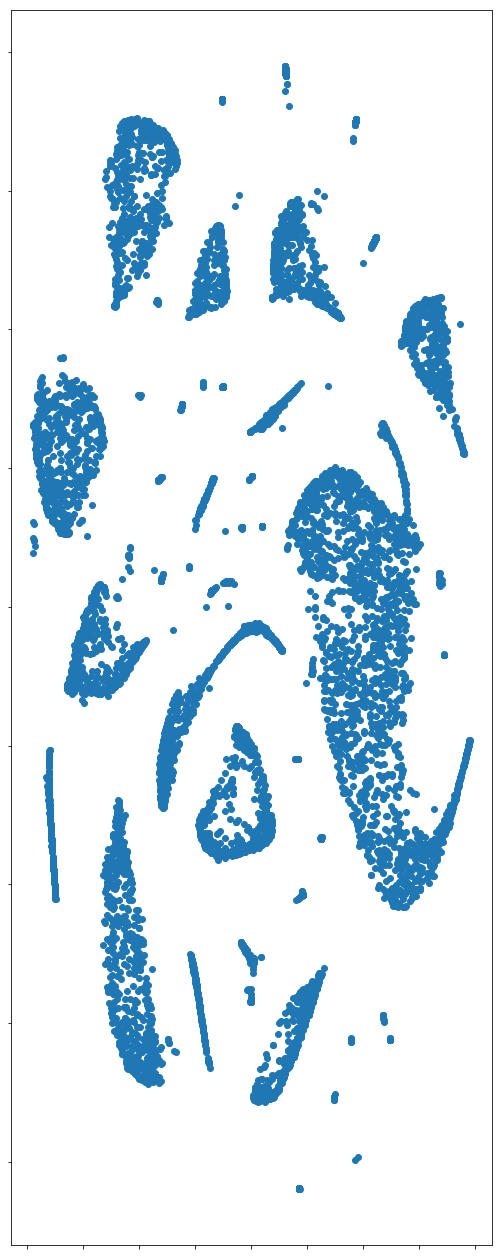

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(tsneResults[:, 0], tsneResults[:, 1], cmap=plt.cm.Spectral)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()


In [16]:
df_tsne = pd.DataFrame(tsneResults)
df_tsne['title'] = df['title']
df_tsne.to_csv('tsneRes.csv', index=False)

In [28]:
df = pd.read_csv("movies_kmeans.csv")
df1 = pd.read_csv("tsne_kmeans.csv")
df1['cluster'] = df['cluster']

In [30]:
df1.to_csv('tsne_clustered.csv', index=False)

In [50]:
df = pd.read_csv("tsneRes.csv")
df

,0,1,title,cluster
0,-2.704993,-6.249259,#Horror,2
1,2.150739,-10.482537,'Crocodile' Dundee II,2
2,9.632280,-2.594433,'G' Men,0
3,9.412822,-2.954201,'Gung Ho!': The Story of Carlson's Makin Islan...,0
4,-8.813752,-4.721866,'Northwest Passage' (Book I -- Rogers' Rangers),1
5,-4.122832,2.282471,'Til There Was You,1
6,8.443183,5.561015,(500) Days of Summer,0
7,-0.644251,-0.559504,...E tu vivrai nel terrore! L'aldil,1
8,2.431631,1.057653,.45,0
9,-1.739306,0.298419,.com for Murder,1


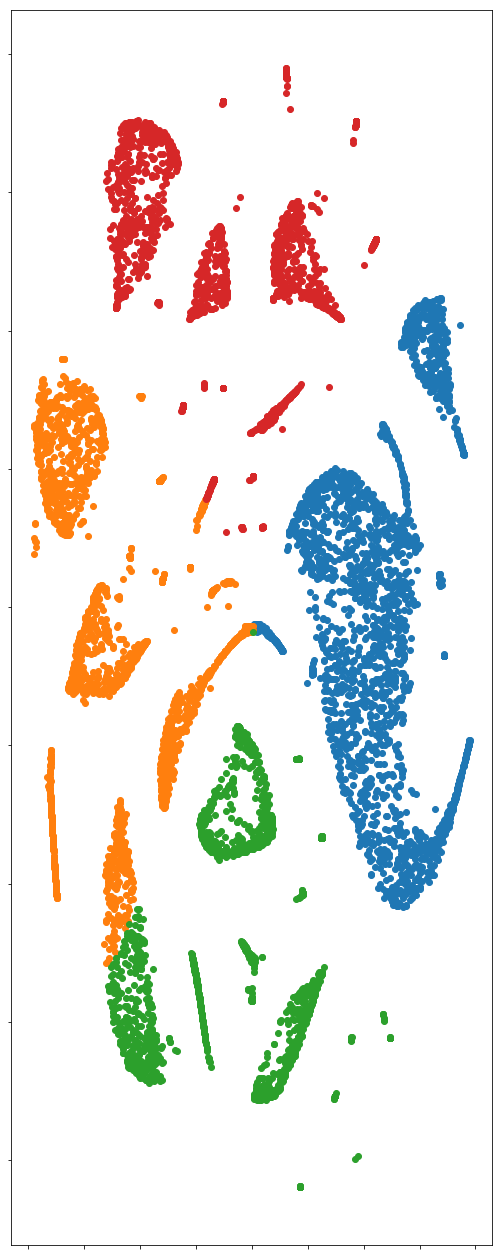

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
fig = plt.figure(figsize=(50, 50))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(df[df.cluster == 0]['0'].values, df[df.cluster == 0]['1'].values)
plt.scatter(df[df.cluster == 1]['0'].values, df[df.cluster == 1]['1'].values)
plt.scatter(df[df.cluster == 2]['0'].values, df[df.cluster == 2]['1'].values)
plt.scatter(df[df.cluster == 3]['0'].values, df[df.cluster == 3]['1'].values)


ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()



In [47]:
from sklearn.cluster import KMeans
import numpy as np
X = df.drop('title',1).values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

df_tsne['cluster'] = kmeans.labels_


In [48]:
df_tsne.to_csv('tsneRes.csv', index=False)

In [25]:
df[df.cluster == 0]['0']

0      -2.704993
2       9.632280
3       9.412822
8       2.431631
11     -2.759945
12      6.592978
16      4.818119
17      4.667368
25      3.615762
26     -5.592073
27      7.080016
28      8.172160
31      6.521283
32      5.972946
34      6.050972
35      6.866679
37      1.525417
41      4.662761
42      2.057767
43      1.635994
44      3.003983
45     -4.443119
46      6.764994
50     -2.761748
53     -2.685700
55      8.628191
56      4.733854
63      1.948783
67     -5.601687
68      6.129121
          ...   
9691   -2.570207
9695    3.870178
9700    6.149440
9703    1.714835
9705    9.601674
9714   -4.215170
9717    3.157726
9719    9.521664
9724   -4.658566
9729   -4.913289
9732   -2.456163
9733    5.835556
9736    6.723690
9742    4.401571
9744    6.962546
9745    5.684419
9746   -5.501129
9749    3.875762
9751    1.293454
9755    6.966021
9756    2.674348
9758    6.841935
9771    7.498091
9772    4.662845
9773    2.110812
9774   -5.322341
9775    6.978734
9777    1.6408